In [147]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [148]:
# Загрузка данных
iris = load_iris()
X, y = iris.data, iris.target

In [149]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
# Создание модели kNN
rf_model = KNeighborsClassifier()

In [151]:
# Определение диапазонов гиперпараметров
params = {
    "n_neighbors": [2, 9],
    "leaf_size": [15, 46],
    "p": [1, 4]
}

In [152]:
# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=100, cv=5, n_jobs=-1)
random_search_res = random_search.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [153]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, cv=5, scoring='accuracy')
grid_search_res = grid_search.fit(X_train, y_train)

In [154]:
# Вывод результатов
print("Best Score:", random_search_res.best_score_)
print("Best Params:", random_search_res.best_params_)

Best Score: 0.9583333333333334
Best Params: {'p': 4, 'n_neighbors': 9, 'leaf_size': 15}


In [155]:
# Вывод результатов
print("Best Score:", grid_search_res.best_score_)
print("Best Params:", grid_search_res.best_params_)

Best Score: 0.9583333333333334
Best Params: {'leaf_size': 15, 'n_neighbors': 9, 'p': 4}


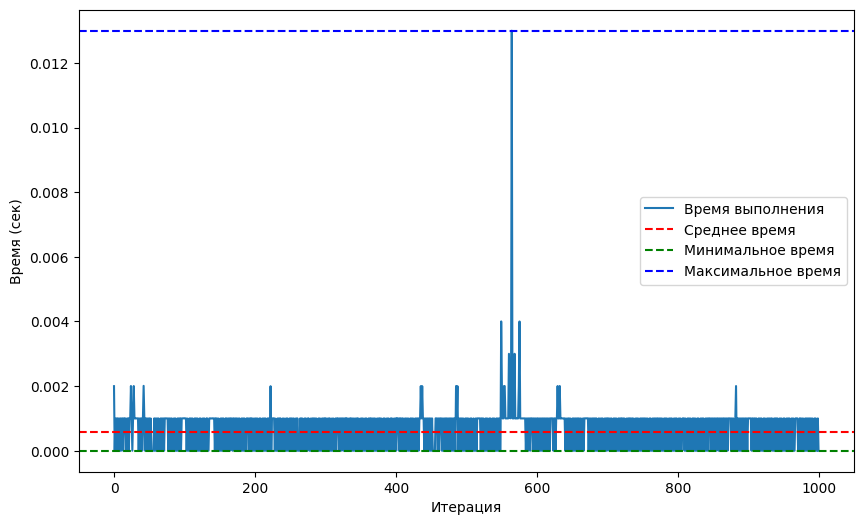

In [156]:
times = []

for i in range(1000):
    start = time.time()
    kNN = KNeighborsClassifier(**grid_search_res.best_params_)
    kNN.fit(X_test, y_test)
    end = time.time()
    times.append(end - start)

# График
plt.figure(figsize=(10, 6))
plt.plot(times, label='Время выполнения')
plt.axhline(y=sum(times)/len(times), color='r', linestyle='--', label='Среднее время')
plt.axhline(y=min(times), color='g', linestyle='--', label='Минимальное время')
plt.axhline(y=max(times), color='b', linestyle='--', label='Максимальное время')
plt.xlabel('Итерация')
plt.ylabel('Время (сек)')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.boxplot(times)
plt.title('Время выполнения')
plt.ylabel('Время (сек)')
plt.show()

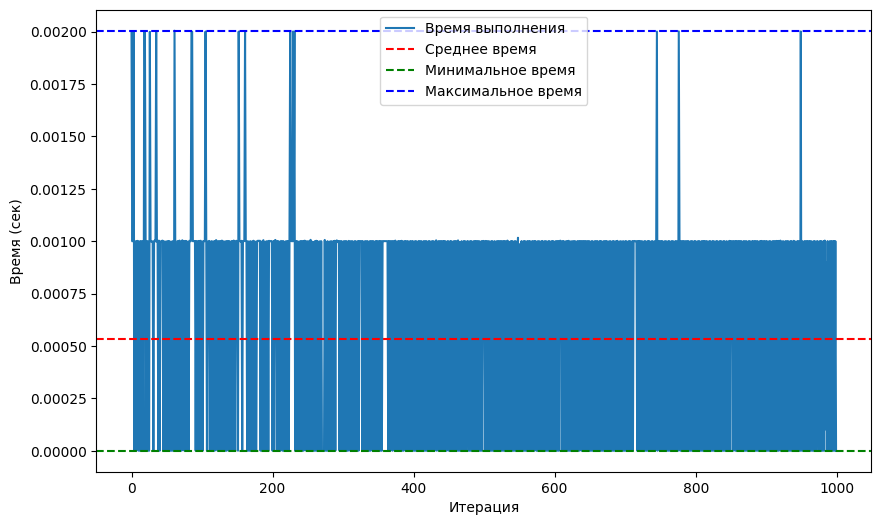

In [157]:
times = []

for i in range(1000):
    start = time.time()
    kNN = KNeighborsClassifier(**random_search_res.best_params_)
    kNN.fit(X_test, y_test)
    end = time.time()
    times.append(end - start)

# График
plt.figure(figsize=(10, 6))
plt.plot(times, label='Время выполнения')
plt.axhline(y=sum(times)/len(times), color='r', linestyle='--', label='Среднее время')
plt.axhline(y=min(times), color='g', linestyle='--', label='Минимальное время')
plt.axhline(y=max(times), color='b', linestyle='--', label='Максимальное время')
plt.xlabel('Итерация')
plt.ylabel('Время (сек)')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.boxplot(times)
plt.title('Время выполнения')
plt.ylabel('Время (сек)')
plt.show()